In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install modAL

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
x_raw=digits['data']
y_raw=digits['target']
n_labeled_examples = x_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=179)

X_train = x_raw[training_indices]
y_train = y_raw[training_indices]



In [ ]:
training_indices

array([1209,   11,    1,  369,  232, 1333, 1770,  125,  964, 1562, 1567,
       1206,  550,  280,  903, 1642, 1061,  955, 1053,  216, 1065,  122,
       1224, 1389,  684,  465,   50,  683, 1760,  994, 1384,  274, 1411,
       1095, 1720, 1109, 1368,  401, 1052, 1391, 1095,  497,  323,  410,
       1272, 1742,  393,   96, 1043,  942, 1750,  254,  495, 1551,  735,
       1147, 1140, 1611, 1407, 1499,  112,  595, 1101, 1021,  617,  343,
        279,  345, 1255, 1590,  306,  800,  819,  432,  864, 1487,  893,
       1175,  234,  654,   66, 1103,  399, 1777,  592,  316,  867, 1583,
        696, 1229, 1431,  973,  525,  981,   86, 1244, 1739,  418,  576,
       1640,  450, 1352, 1253,  111,  429, 1039,  889,   31,  221,  611,
        669,  443,  440,  156, 1474,  802, 1489,  881,  756, 1639,  809,
       1644, 1310,  282,  369, 1483,  769, 1635,  877,  881, 1446, 1472,
       1398, 1527,  284,  801,  709,  711,  696, 1480, 1459, 1758, 1031,
       1421, 1433,  450, 1283, 1575, 1044,  415,  1

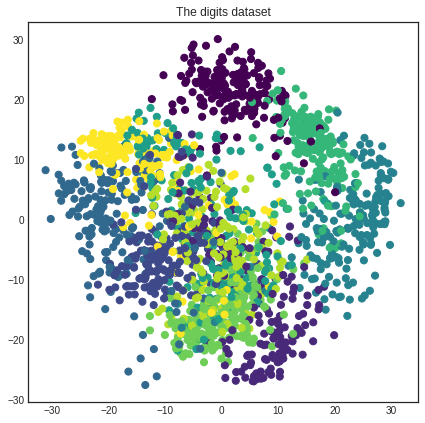

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# loading the digits dataset
digits = load_digits()

# visualizing the classes
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    pca = PCA(n_components=2).fit_transform(digits['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=digits['target'], cmap='viridis', s=50)
    plt.title('The digits dataset')
    plt.show()



In [ ]:
X_pool = np.delete(x_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

In [ ]:
from modAL.disagreement import vote_entropy

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

from modAL.models import ActiveLearner, Committee

# initializing Committee members
n_members = 5
learner_list = list()

learner1 = ActiveLearner(
        estimator=RandomForestClassifier(max_depth=5), X_training=X_train, y_training=y_train
    )
learner2 = ActiveLearner(estimator=AdaBoostClassifier(), X_training=X_train, y_training=y_train)
learner3 = ActiveLearner(
        estimator=DecisionTreeClassifier(max_depth=5), X_training=X_train, y_training=y_train
    )
learner4= ActiveLearner(
        estimator=KNeighborsClassifier(3), X_training=X_train, y_training=y_train
    )
learner5=ActiveLearner(
        estimator=GaussianProcessClassifier(), X_training=X_train, y_training=y_train
    )
#learner5=ActiveLearner(
#        estimator=LinearDiscriminantAnalysis(), X_training=X_train, y_training=y_train
#   )
learner_list.append(learner1)
learner_list.append(learner2)
learner_list.append(learner3)
learner_list.append(learner4)
learner_list.append(learner5)

# assembling the committee
committee = Committee(learner_list=learner_list,query_strategy=vote_entropy)

In [ ]:
predictions = committee.predict(x_raw)
is_correct = (predictions == y_raw)


In [ ]:
unqueried_score=committee.score(x_raw,y_raw)
unqueried_score

0.8853644963828603

In [ ]:
unqueried_score = committee.score(digits['data'], digits['target'])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = committee.predict(digits['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Committee initial predictions, accuracy = %1.3f' % unqueried_score)
    plt.show()

NameError: ignored

For ordering points that reduce the version space maximum  

In [ ]:
arr=committee.query(x_raw)
arr=np.asarray(arr)
np.unique(arr,return_counts=True)
uniq=np.unique(arr)
uniq

array([0.        , 0.50040242, 0.67301167, 0.95027054, 1.05492017,
       1.33217904, 1.60943791])

In [ ]:
for i in range(1797):
  if(arr[i]==uniq[1]):
    print(i)

1
11
13
15
16
19
31
32
35
39
45
50
51
59
60
62
63
66
71
74
86
91
96
98
102
105
109
111
112
117
119
121
122
125
128
133
139
143
144
145
149
153
155
156
159
162
163
165
167
169
175
176
190
193
199
200
201
203
204
216
219
220
221
223
232
233
234
247
251
254
261
269
271
274
280
281
282
284
285
287
288
293
295
301
302
306
315
318
319
327
330
339
343
347
358
359
365
367
369
373
376
381
385
395
405
410
411
415
417
419
423
429
431
440
443
445
448
450
459
460
465
477
478
488
491
497
499
503
506
511
514
525
529
535
550
553
555
561
573
575
579
587
592
595
599
608
611
614
617
621
625
635
641
644
649
651
654
661
662
665
671
675
677
679
680
681
683
684
685
691
692
696
706
711
715
717
719
720
726
729
736
738
748
751
755
756
763
766
769
774
781
785
789
791
799
800
802
805
807
811
815
819
821
822
835
839
845
849
859
864
865
868
874
877
878
879
881
885
889
895
896
901
904
908
910
914
918
924
928
934
936
937
938
942
944
961
962
963
964
971
975
981
990
993
994
999
1006
1020
1024
1027
1031
1032
1034
1039
1

In [ ]:

performance_history = [unqueried_score]


while committee.score(x_raw, y_raw) < 0.99:
    stream_idx = np.random.choice(range(len(X_pool)))
    if committee.query(X_pool[stream_idx].reshape(1, -1)) >= 0.5:
        committee.teach(X_pool[stream_idx].reshape(1, -1), y_pool[stream_idx].reshape(-1, ))
        new_score = committee.score(x_raw, y_raw)
        performance_history.append(new_score)
        X_pool = np.delete(X_pool, stream_idx, axis=0)
        y_pool = np.delete(y_pool, stream_idx)
        print('Data Point no. %d queried, new accuracy: %f' % (stream_idx, new_score))

Data Point no. 792 queried, new accuracy: 0.873122
Data Point no. 535 queried, new accuracy: 0.878687
Data Point no. 498 queried, new accuracy: 0.879800
Data Point no. 1030 queried, new accuracy: 0.881469
Data Point no. 660 queried, new accuracy: 0.870896
Data Point no. 649 queried, new accuracy: 0.880913
Data Point no. 565 queried, new accuracy: 0.874235
Data Point no. 236 queried, new accuracy: 0.879800
Data Point no. 106 queried, new accuracy: 0.879243
Data Point no. 1226 queried, new accuracy: 0.880356
Data Point no. 1531 queried, new accuracy: 0.884808
Data Point no. 1545 queried, new accuracy: 0.881469
Data Point no. 784 queried, new accuracy: 0.879800
Data Point no. 1093 queried, new accuracy: 0.874791
Data Point no. 195 queried, new accuracy: 0.879800
Data Point no. 666 queried, new accuracy: 0.877574
Data Point no. 962 queried, new accuracy: 0.880356
Data Point no. 619 queried, new accuracy: 0.882026
Data Point no. 320 queried, new accuracy: 0.874235
Data Point no. 246 queried

KeyboardInterrupt: ignored

Text(0, 0.5, 'Classification Accuracy')

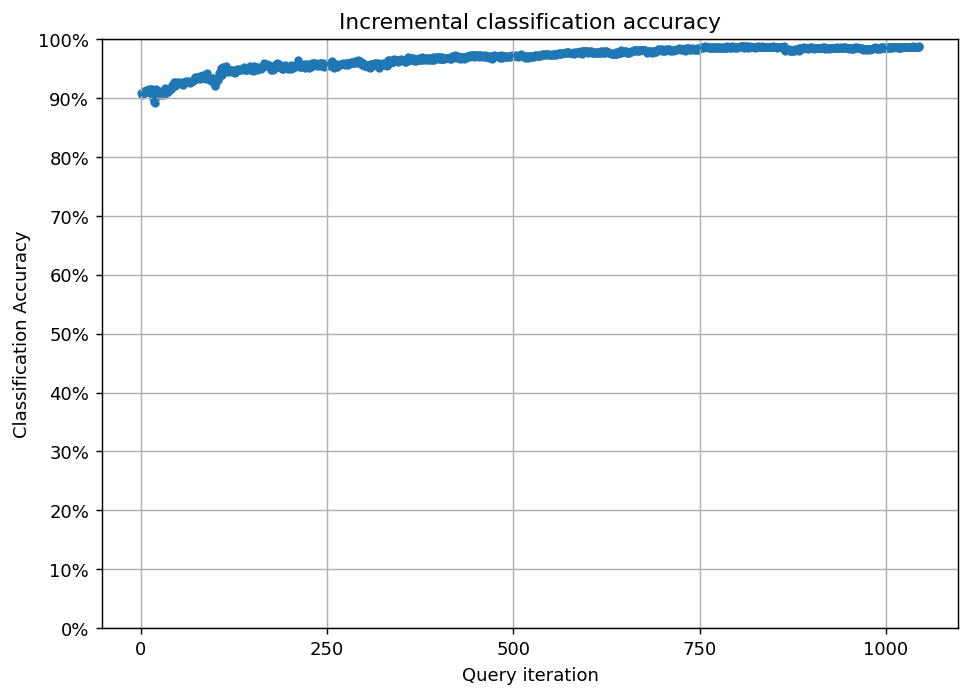

In [ ]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')


Text(0, 0.5, 'Classification Accuracy')

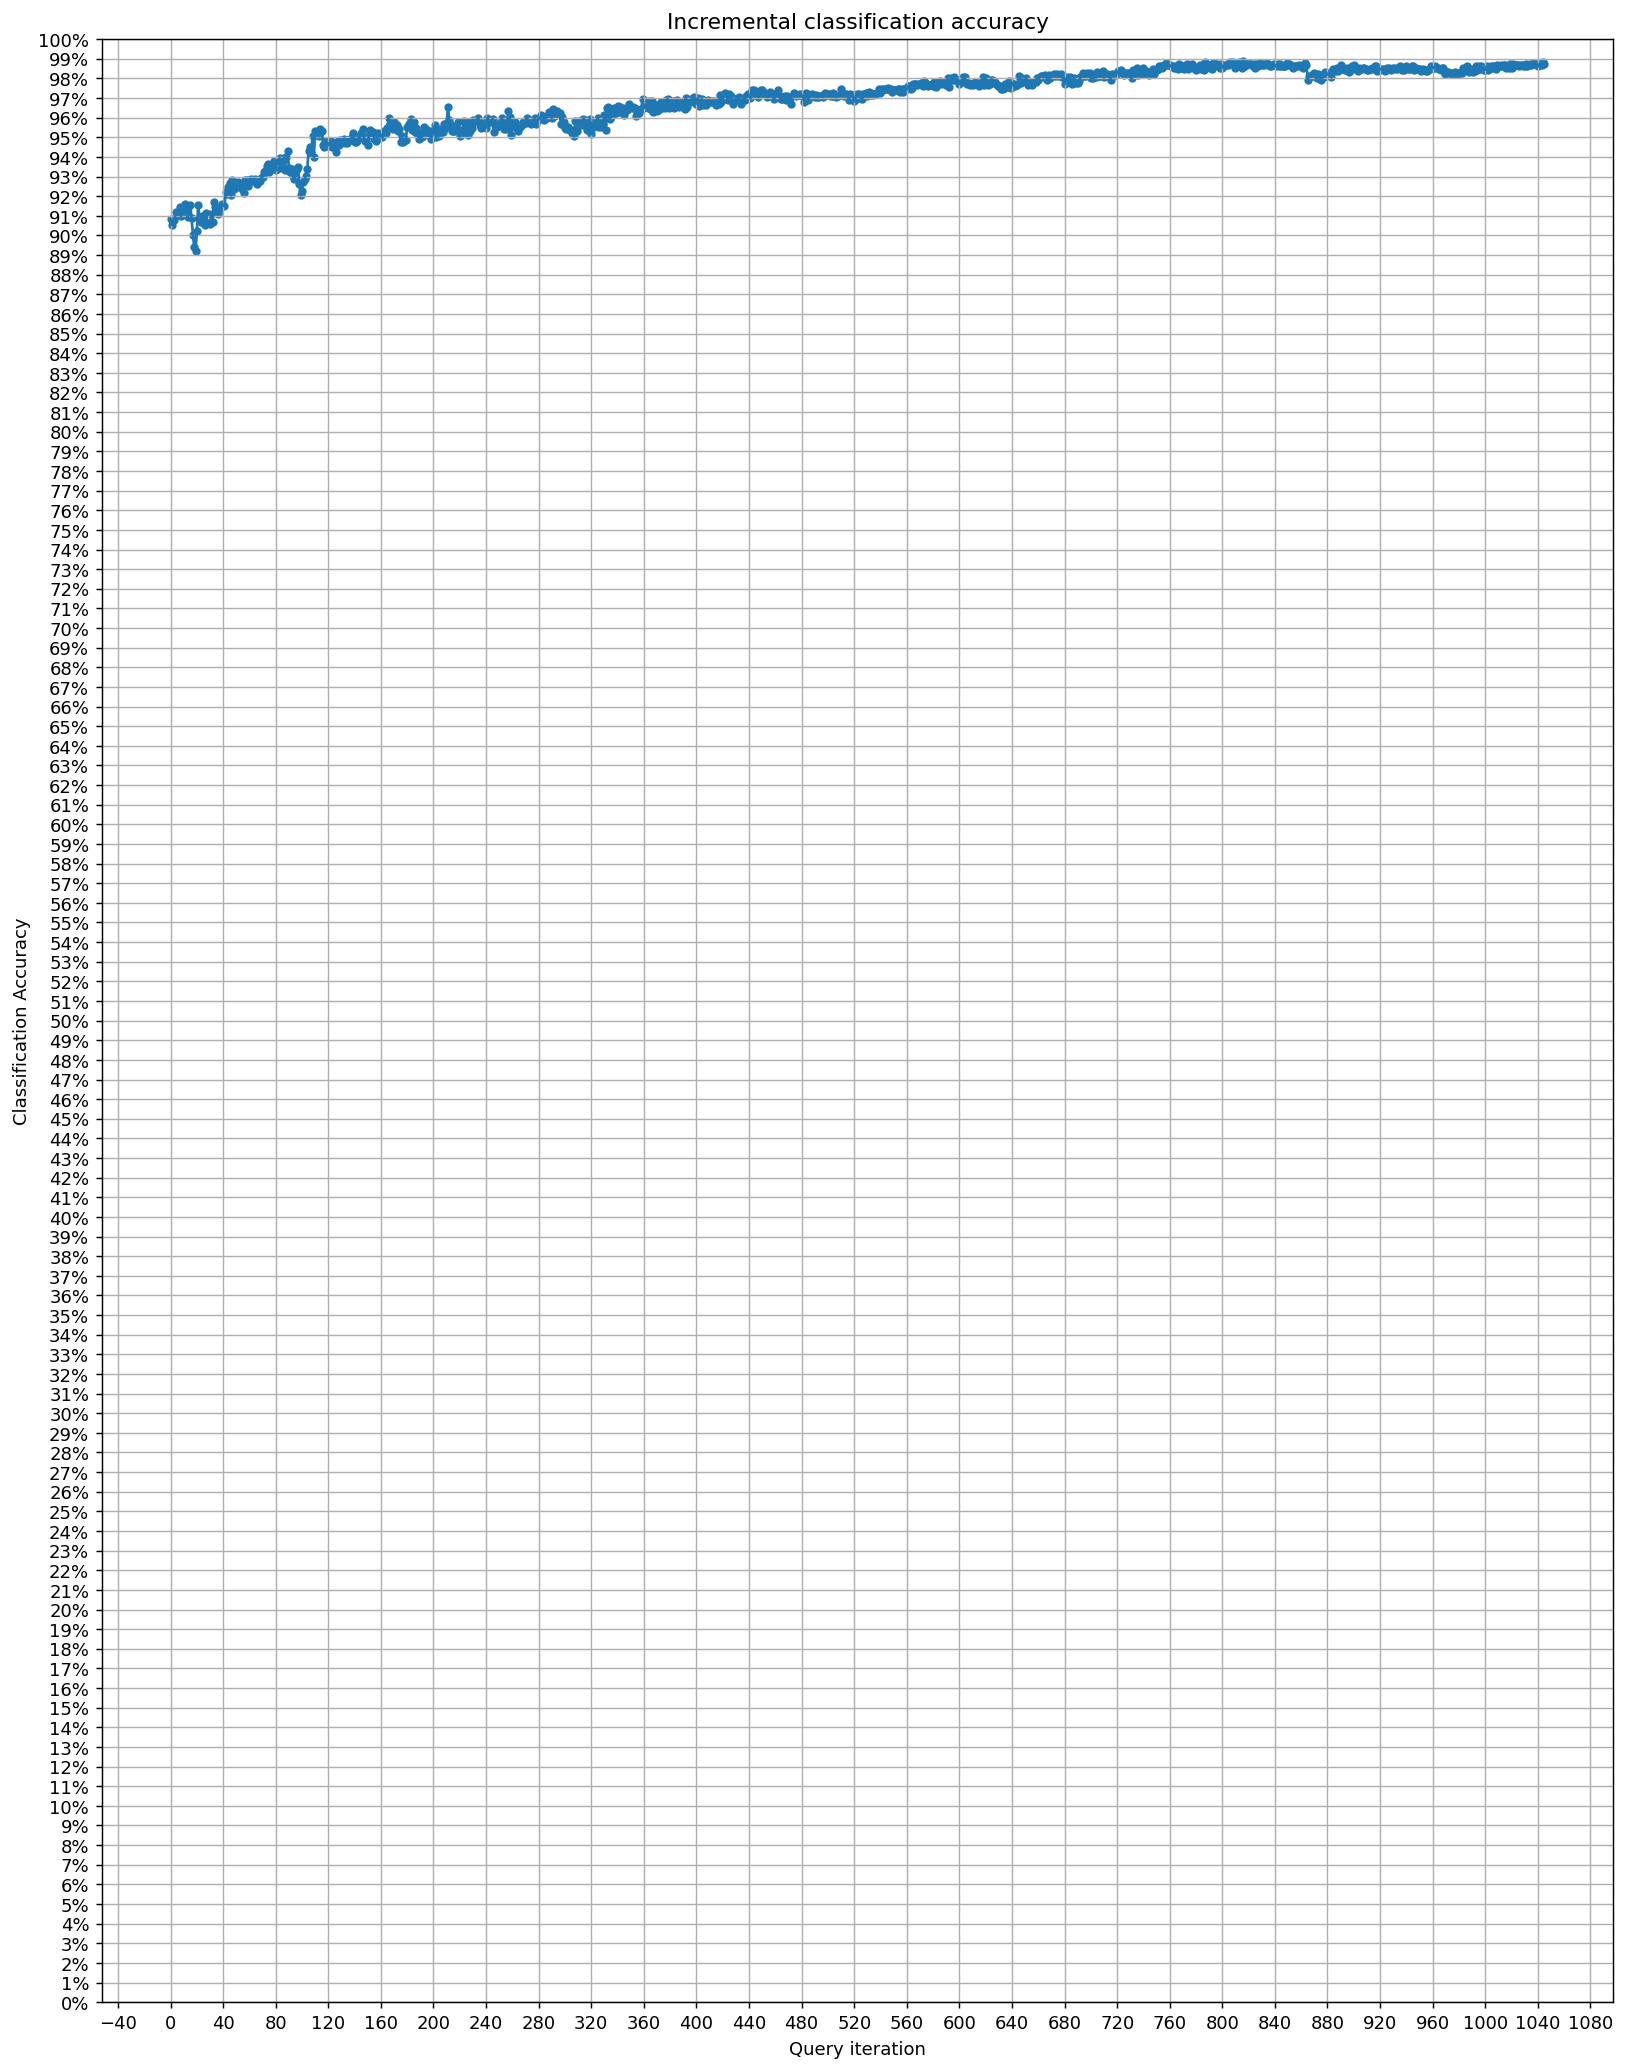

In [ ]:
fig, ax = plt.subplots(figsize=(15, 20), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=30, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=100))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')


Queried Data Point and accuracy